<a href="https://colab.research.google.com/github/ysc4/CCADMACL_EXERCISES_COM222-ML/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

## Import the libraries

In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


## Load the data

In [620]:
X = pd.read_csv('creditcard.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values
X.fillna(method ='ffill', inplace = True)

print(X.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182      95.40  ...        139.509787          0.000000      12
1  3202.467416           0.909091       0.00  ...       1072.340217          0.222222      12
2  2495.148862           1.000000     773.17  ...        627.284787          0.000000      12
3  1666.670542           0.636364    1499.00  ...        627.284787          0.000000      12
4   817.714335           1.000000      16.00  ...        244.791237          0.000000      12

[5 rows x 17 columns]


<ipython-input-620-40fe016c1c05>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


## Pre-process the data

In [621]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


## Reduce the dimensionality of the data using PCA

In [622]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())


         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


## Train a DBSCAN model using default values

In [623]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN().fit(X_principal)
labels = db_default.labels_

## Plot the clustered data

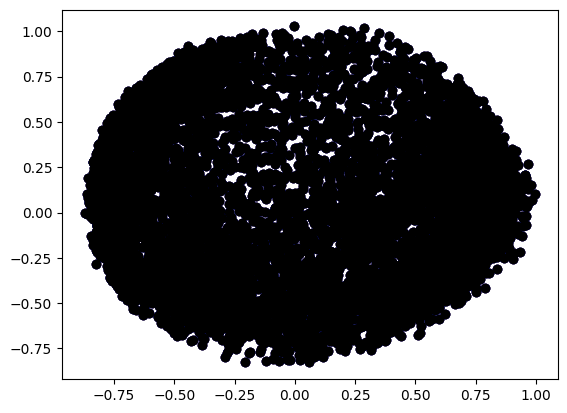

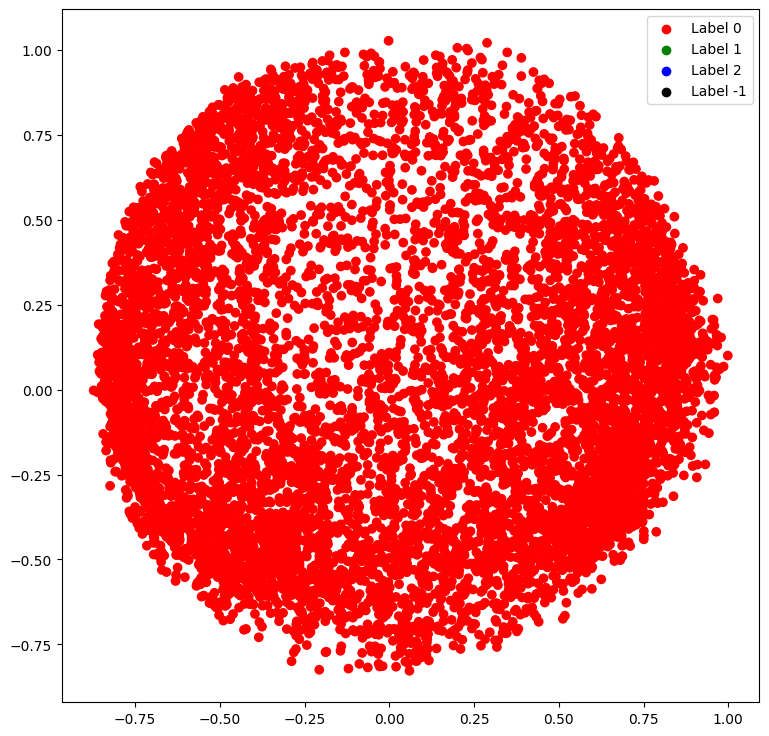

In [624]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()


1. Train a DBSCAN model

In [625]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'eps': [0.1355, 0.28755, 0.3],
    'min_samples': [1000, 2000, 3000]
}
best_params = None
best_score = -1

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_principal)
    if len(set(labels)) > 1:
        score = metrics.silhouette_score(X_principal, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Best params:", best_params)
print("Best silhouette score:", best_score)

Best params: {'eps': 0.28755, 'min_samples': 1000}
Best silhouette score: 0.43012834802655386


In [626]:
# def find_best_dbscan_params(X, radius_range, min_samples_range):

#     best_score = -1
#     best_params = {}

#     for radius in radius_range:
#         for min_samples in min_samples_range:
#             dbscan = DBSCAN(eps=radius, min_samples=min_samples)
#             try:
#                 labels = dbscan.fit_predict(X)
#                 n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#                 if n_clusters >= 2:
#                     score = metrics.silhouette_score(X, labels)
#                     if score > best_score:
#                         best_score = score
#                         best_params = {
#                             "radius": radius,
#                             "min_samples": min_samples,
#                             "silhouette_score": score,
#                             "n_clusters": n_clusters
#                         }
#             except ValueError as e:
#                 print(f"Error with radius={radius}, min_samples={min_samples}: {e}")

#     return best_params

In [627]:
# radius_range = np.linspace(0.2, 0.29)
# min_samples_range = range(500, 1000)

# best_params = find_best_dbscan_params(X_principal, radius_range, min_samples_range)
# print(best_params)

In [628]:
db = DBSCAN(eps = 0.2877, min_samples = 1000)
model = db.fit(X_principal)

In [629]:
labels = db.labels_

2. Plot the clustered data

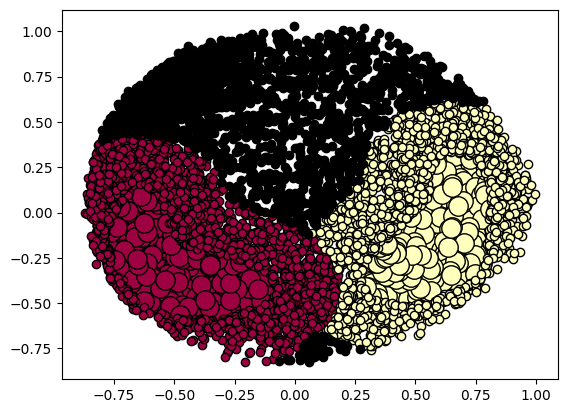

In [630]:
#put your answer here

unique = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique))]

for k, col in zip(unique, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_principal[class_member_mask & core_samples_mask]
    plt.plot(xy['P1'], xy['P2'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X_principal[class_member_mask & ~core_samples_mask]
    plt.plot(xy['P1'], xy['P2'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.show()

3. Print the number of clusters

In [631]:
#put your answer here

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

2

4. Print the number of noisy data

In [632]:
#put your answer here

n_noise = list(labels).count(-1)
n_noise

1955

5. Print the silhouette score

In [633]:
#put your answer here

print(metrics.silhouette_score(X_principal, labels))

0.43042492174211977
